# TP4 : Paramètres et robustesse des méthodes de réduction de dimension (Corrigé)

Ce corrigé présente l'impact des paramètres et du bruit sur la robustesse des méthodes de réduction de dimension.

## Objectifs et démarche
- Tester différents paramètres pour chaque méthode
- Évaluer la robustesse face au bruit et aux données incomplètes
- Visualiser et comparer les résultats

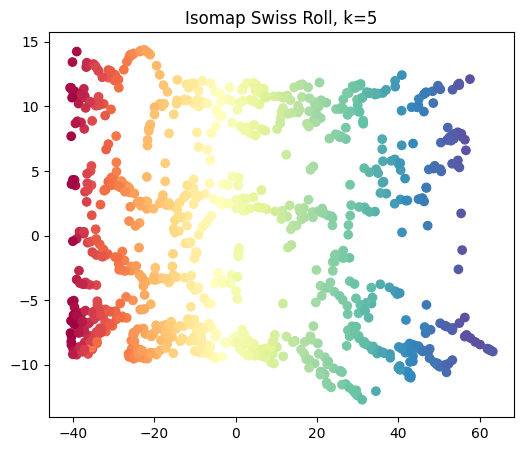

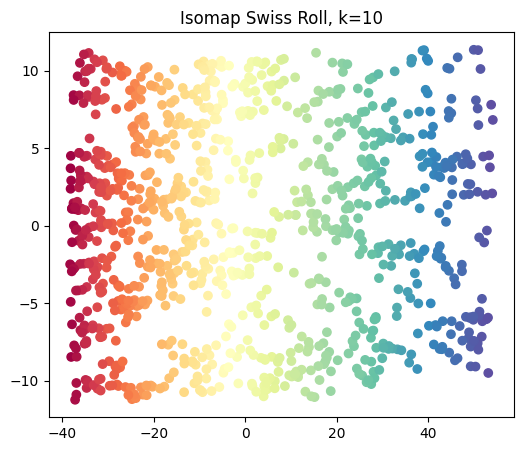

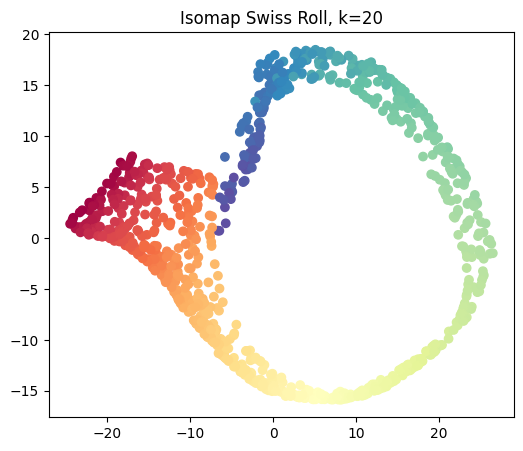

In [1]:
# 1. Isomap avec différents k
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
X, color = make_swiss_roll(n_samples=1000, noise=0.05)
for k in [5, 10, 20]:
    isomap = Isomap(n_neighbors=k, n_components=2)
    X_iso = isomap.fit_transform(X)
    plt.figure(figsize=(6,5))
    plt.scatter(X_iso[:,0], X_iso[:,1], c=color, cmap='Spectral')
    plt.title(f'Isomap Swiss Roll, k={k}')
    plt.show()

In [ ]:
# 2. Diffusion Maps avec différents paramètres
# Nécessite PyGSP, exemple de variation de epsilon et t
# ... code à compléter pour une vraie diffusion map ...

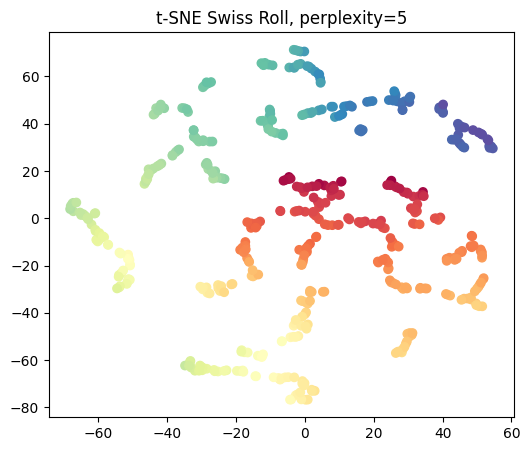

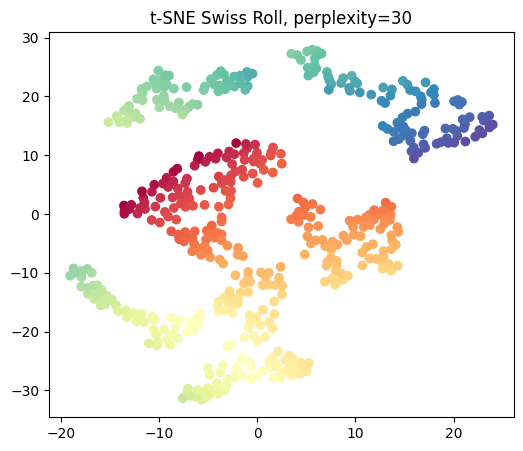

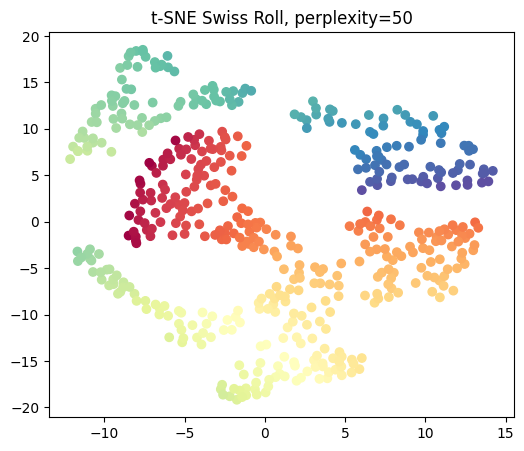

In [2]:
# 3. t-SNE avec différentes valeurs de perplexité et learning rate
from sklearn.manifold import TSNE
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X[:500])
    plt.figure(figsize=(6,5))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color[:500], cmap='Spectral')
    plt.title(f't-SNE Swiss Roll, perplexity={perplexity}')
    plt.show()

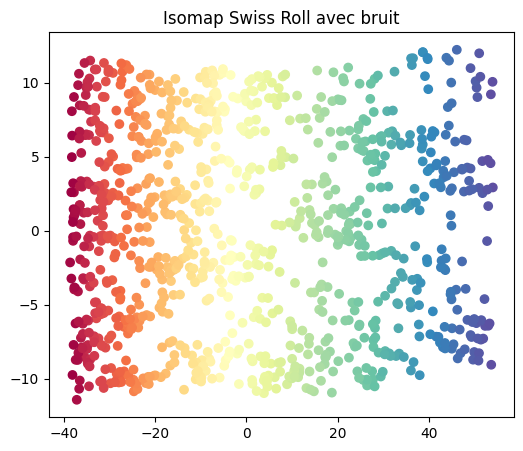

In [4]:
# 4. Ajouter du bruit ou retirer des points
import numpy as np
X_noisy = X + np.random.normal(0, 0.2, X.shape)
isomap = Isomap(n_neighbors=10, n_components=2)
X_iso_noisy = isomap.fit_transform(X_noisy)
plt.figure(figsize=(6,5))
plt.scatter(X_iso_noisy[:,0], X_iso_noisy[:,1], c=color, cmap='Spectral')
plt.title('Isomap Swiss Roll avec bruit')
plt.show()

## Analyse et comparaison
- Les paramètres influencent fortement la qualité de la réduction de dimension : un mauvais choix de k pour Isomap ou de perplexity pour t-SNE peut dégrader la séparation des classes ou la structure révélée.
- Le bruit et les données manquantes peuvent dégrader les résultats : Isomap et t-SNE sont sensibles au bruit, tandis que Diffusion Maps est généralement plus robuste grâce à la diffusion sur le graphe.
- Pour Isomap, un k trop faible fragmente le graphe, un k trop élevé le rend trop dense et perd la structure locale.
- Pour t-SNE, la perplexity contrôle la taille des clusters : trop faible, les groupes sont trop serrés ; trop élevée, la structure globale est perdue.
- Diffusion Maps dépend du choix du noyau et du paramètre d'échelle (sigma), mais offre une bonne robustesse aux perturbations locales.
- En présence de bruit, la visualisation peut montrer des points dispersés ou des clusters mal séparés : il est alors utile de tester plusieurs paramètres et de comparer les méthodes.

**Conclusion :**
- Il est essentiel de tester et d'ajuster les paramètres pour chaque méthode selon le jeu de données et l'objectif.
- La robustesse varie : Diffusion Maps est souvent le plus stable, t-SNE le plus performant pour la visualisation locale, Isomap efficace pour les structures globales mais sensible au bruit.
- Une analyse comparative et des visualisations multiples permettent de choisir la méthode et les paramètres les plus adaptés.